<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GCN" data-toc-modified-id="GCN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GCN</a></span></li><li><span><a href="#简单分步示例" data-toc-modified-id="简单分步示例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>简单分步示例</a></span><ul class="toc-item"><li><span><a href="#创建有向图-邻接矩阵" data-toc-modified-id="创建有向图-邻接矩阵-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>创建有向图 邻接矩阵</a></span></li><li><span><a href="#进行传播规则" data-toc-modified-id="进行传播规则-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>进行传播规则</a></span></li><li><span><a href="#增加-self-loop" data-toc-modified-id="增加-self-loop-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>增加 self-loop</a></span></li><li><span><a href="#归一化处理" data-toc-modified-id="归一化处理-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>归一化处理</a></span></li></ul></li><li><span><a href="#Putting-it-All-Together" data-toc-modified-id="Putting-it-All-Together-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Putting it All Together</a></span><ul class="toc-item"><li><span><a href="#计算-A_hat-的度矩阵" data-toc-modified-id="计算-A_hat-的度矩阵-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>计算 A_hat 的度矩阵</a></span></li><li><span><a href="#参数初始化" data-toc-modified-id="参数初始化-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>参数初始化</a></span></li><li><span><a href="#应用激活函数" data-toc-modified-id="应用激活函数-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>应用激活函数</a></span></li></ul></li><li><span><a href="#应用到真实数据集" data-toc-modified-id="应用到真实数据集-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>应用到真实数据集</a></span><ul class="toc-item"><li><span><a href="#数据集可视化" data-toc-modified-id="数据集可视化-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>数据集可视化</a></span></li><li><span><a href="#构建-GCN" data-toc-modified-id="构建-GCN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>构建 GCN</a></span></li><li><span><a href="#去掉-relu" data-toc-modified-id="去掉-relu-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>去掉 relu</a></span></li></ul></li></ul></div>

* 本文需要对 GCN 有基础的了解


* 参考 ：[How to do Deep Learning on Graphs with Graph Convolutional Networks](https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780?source=user_profile---------2-----------------------) 

In [36]:
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib notebook

# GCN

传播规则：

$$
f\left(\boldsymbol{H}^{i}, \boldsymbol{A}\right)=\sigma\left(\boldsymbol{A} \boldsymbol{H}^{i} \boldsymbol{W}^{i}\right)
$$

简化： 

$$
A H^{0} W^{0}=A X W^{0}=A X
$$

$$
f(X, A)=A X
$$

# 简单分步示例

<img src="https://tva1.sinaimg.cn/large/007S8ZIlly1gdzzheeq2pj30pu0lujtf.jpg" width="30%">


## 创建有向图 邻接矩阵

In [6]:
A = np.matrix([[0, 1, 0, 0], 
               [0, 0, 1, 1], 
               [0, 1, 0, 0], 
               [1, 0, 1, 0]],
              dtype=float)

# 创建特征 ： 基于索引生成 整数特征
X = np.matrix([[i, -i] for i in range(A.shape[0])], dtype=float)
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

## 进行传播规则
节点更新后的特征： 是邻居节点的特征和 (有向图中指向的点为邻居)

In [7]:
A*X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

## 增加 self-loop
节点聚合之后的特征包含自身的特征

In [8]:
I = np.matrix(np.eye(A.shape[0])) # 单位对角阵
A_hat = A + I 
A_hat* X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

## 归一化处理
通过节点度矩阵进行归一化
$$
f(X, A)=D^{-1} A X
$$

In [12]:
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
D

matrix([[1., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 1.]])

In [15]:
A_nor = D**-1 * A
A_nor

matrix([[0. , 1. , 0. , 0. ],
        [0. , 0. , 0.5, 0.5],
        [0. , 0.5, 0. , 0. ],
        [1. , 0. , 1. , 0. ]])

In [16]:
A_nor * X

matrix([[ 1. , -1. ],
        [ 2.5, -2.5],
        [ 0.5, -0.5],
        [ 2. , -2. ]])

相当于对聚合的邻居特征求了平均值

# Putting it All Together
self-loop + 归一化 + 权重参数 W +  激活函数

## 计算 A_hat 的度矩阵

In [19]:
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat

matrix([[2., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 0., 3., 0.],
        [0., 0., 0., 2.]])

## 参数初始化
W: 2 x 2
* 前面的 2 代表输入的特征纬度
* 后面的 2 代表想要输出的纬度

In [26]:
W = np.matrix([[1, -1], 
               [-1, 1]])

In [27]:
h_1 = D_hat**-1 * A_hat * X * W
h_1

matrix([[ 1., -1.],
        [ 4., -4.],
        [ 2., -2.],
        [ 5., -5.]])

也可以减小输出的纬度 

W： 2x1

In [28]:
W = np.matrix([[1], 
               [-1]])
h_2 = D_hat**-1 * A_hat * X * W
h_2

matrix([[1.],
        [4.],
        [2.],
        [5.]])

## 应用激活函数
Relu : 
$$
f(x)=\max (0, x)
$$

In [23]:
def relu(x):
    return (abs(x) + x) /2

In [31]:
h_3 = relu(h_1)
h_3

matrix([[1., 0.],
        [4., 0.],
        [2., 0.],
        [5., 0.]])

# 应用到真实数据集
空手道俱乐部: Each node in the returned graph has a node attribute 'club' that
indicates the name of the club to which the member represented by that node
    belongs, either 'Mr. Hi' or 'Officer'

数据集 : https://networkx.github.io/documentation/stable/_modules/networkx/generators/social.html#karate_club_graph

```
>>> import networkx as nx
>>> G = nx.karate_club_graph()
>>> G.nodes[5]['club']
'Mr. Hi'
>>> G.nodes[9]['club']
'Officer'
```

<img style="float:;" src="https://tva1.sinaimg.cn/large/007S8ZIlgy1ge010li9dyj30ya0u0ala.jpg" width="30%">


## 数据集可视化

In [38]:
G_kar = nx.karate_club_graph()

In [62]:
def plot_graph(G):
    '''
    G: a networkx G
    '''
    plt.figure()
    pos = nx.spring_layout(G, seed=1234)
    # Position nodes using Fruchterman-Reingold force-directed algorithm.
    # return A dictionary of positions keyed by node
    # 固定seed 避免每次生成位置不同
    edges = G.edges()

    nodelist1 = []
    nodelist2 = []
    for i in range(34):
        if G.nodes[i]['club'] == 'Mr. Hi':
            nodelist1.append(i)
        else:
            nodelist2.append(i)
    nx.draw_networkx(G, pos, edges=edges)
    nx.draw_networkx_nodes(G,
                           pos,
                           nodelist=nodelist1,
                           node_size=200,
                           node_color='lightcoral',
                           alpha=0.7)
    nx.draw_networkx_nodes(G,
                           pos,
                           nodelist=nodelist2,
                           node_size=200,
                           node_color='skyblue',
                           alpha=0.7)

<IPython.core.display.Javascript object>


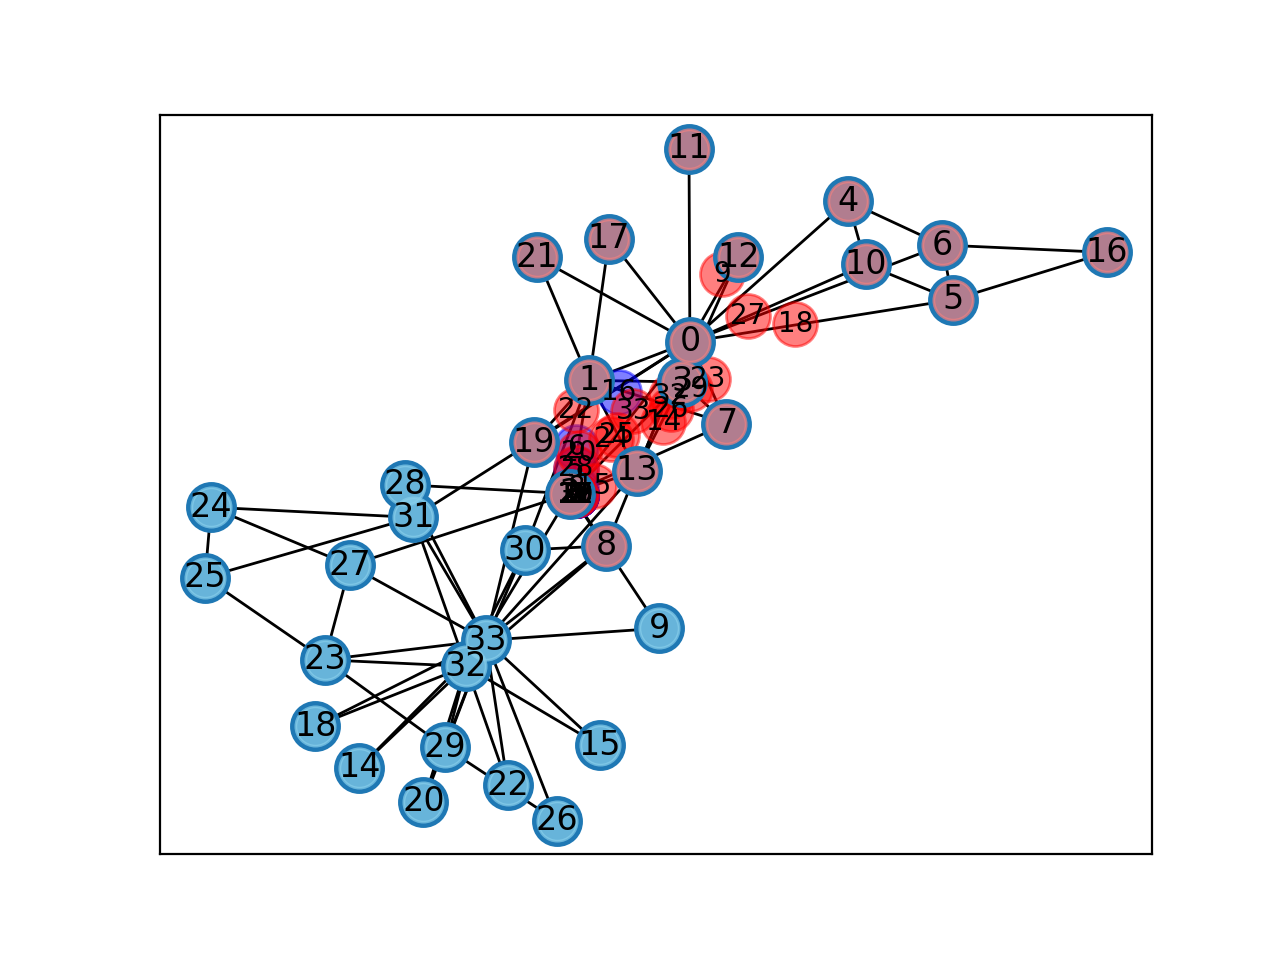

In [63]:
plot_graph(G_kar)

## 构建 GCN

In [70]:
from networkx import karate_club_graph, to_numpy_matrix

zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))

# 按照节点顺序创建矩阵
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())

A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

# 随机初始化矩阵:标准正态分布
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(), 4)) # 输出4 个特征
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2)) # 输出两个特征

In [65]:
# 定义 GCN 传播层
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

In [71]:
H_1 = gcn_layer(A_hat, D_hat, I, W_1) # 单位阵 (one-hot) 作为初始特征
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
output

matrix([[0.11743332, 0.        ],
        [0.        , 0.        ],
        [0.23761968, 0.        ],
        [0.        , 0.        ],
        [0.16797176, 0.        ],
        [0.12593345, 0.        ],
        [0.07769329, 0.        ],
        [0.        , 0.01636965],
        [0.30804179, 0.        ],
        [0.36372876, 0.        ],
        [0.13777397, 0.        ],
        [0.2544023 , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.69047194, 0.        ],
        [0.71065603, 0.        ],
        [0.08763562, 0.        ],
        [0.        , 0.0315847 ],
        [0.82880027, 0.        ],
        [0.08009458, 0.        ],
        [0.55756427, 0.        ],
        [0.        , 0.02975639],
        [0.68853292, 0.        ],
        [0.64212557, 0.        ],
        [0.76219299, 0.        ],
        [0.70790021, 0.        ],
        [0.44018507, 0.        ],
        [0.45538525, 0.        ],
        [0.519651  , 0.        ],
        [0.499

In [72]:
feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}
feature_representations

{0: array([0.11743332, 0.        ]),
 1: array([0., 0.]),
 2: array([0.23761968, 0.        ]),
 3: array([0., 0.]),
 4: array([0.16797176, 0.        ]),
 5: array([0.12593345, 0.        ]),
 6: array([0.07769329, 0.        ]),
 7: array([0.        , 0.01636965]),
 8: array([0.30804179, 0.        ]),
 9: array([0.36372876, 0.        ]),
 10: array([0.13777397, 0.        ]),
 11: array([0.2544023, 0.       ]),
 12: array([0., 0.]),
 13: array([0., 0.]),
 14: array([0.69047194, 0.        ]),
 15: array([0.71065603, 0.        ]),
 16: array([0.08763562, 0.        ]),
 17: array([0.       , 0.0315847]),
 18: array([0.82880027, 0.        ]),
 19: array([0.08009458, 0.        ]),
 20: array([0.55756427, 0.        ]),
 21: array([0.        , 0.02975639]),
 22: array([0.68853292, 0.        ]),
 23: array([0.64212557, 0.        ]),
 24: array([0.76219299, 0.        ]),
 25: array([0.70790021, 0.        ]),
 26: array([0.44018507, 0.        ]),
 27: array([0.45538525, 0.        ]),
 28: array([0.

In [74]:
def plot_result(output):
    plt.figure()
    for i in range (34):
        if zkc.nodes[i]['club'] == 'Mr. Hi':
            plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = 'b',alpha=0.5,s = 250)
            plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
        # 为每个点添加标签，一些形如（x轴，y轴，标签）的元组，水平及垂直位置，背景颜色
        else:
            plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label = 'i',color = 'r',alpha=0.5,s = 250)
            plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})

<IPython.core.display.Javascript object>


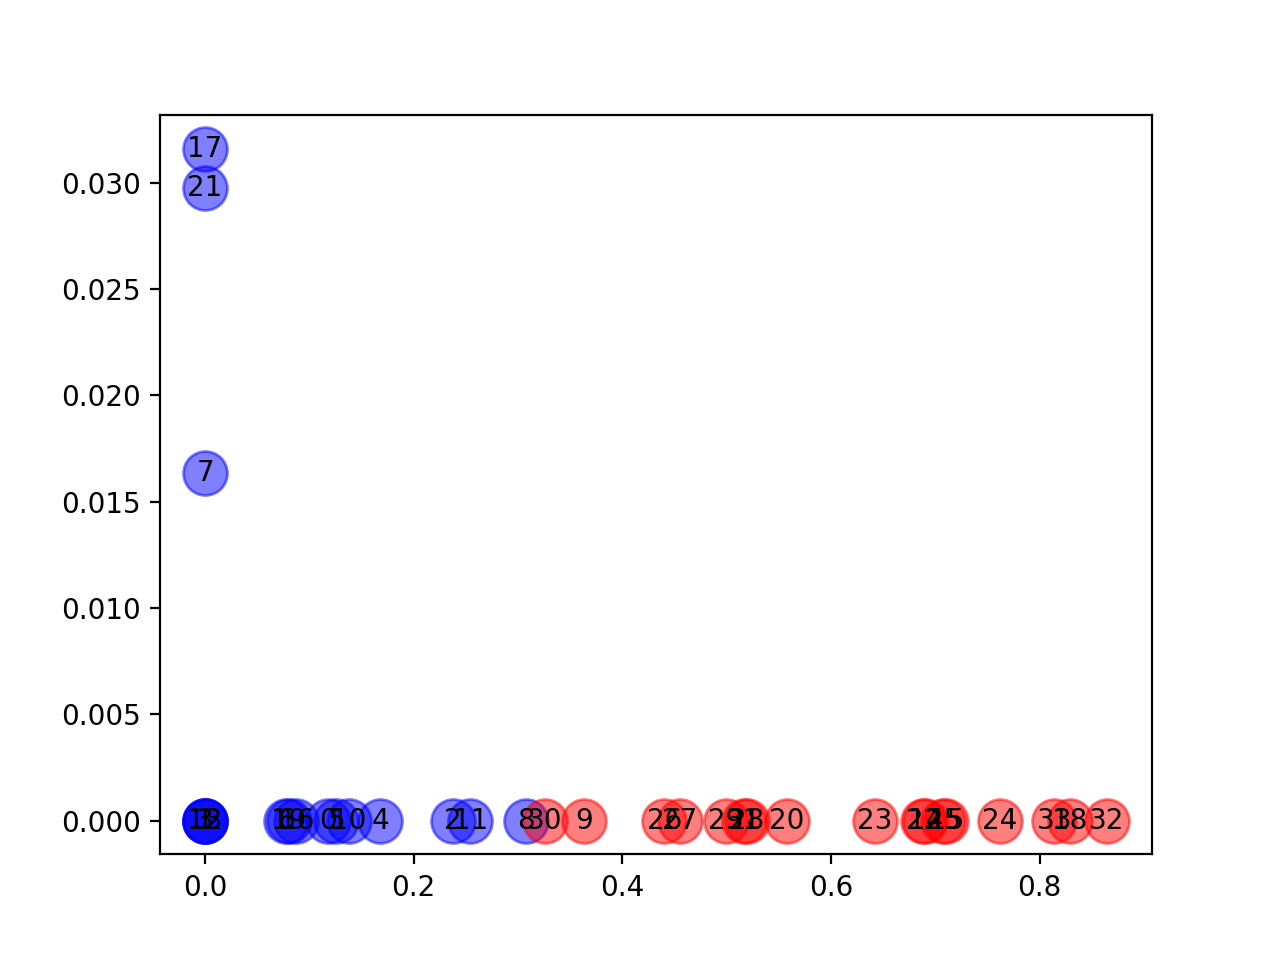

In [75]:
plot_result(output)

太多 0 值， 表现不是很好

## 去掉 relu

In [76]:
def gcn_layer_norelu(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W

In [77]:
H_1 = gcn_layer_norelu(A_hat, D_hat, I, W_1) # 单位阵 (one-hot) 作为初始特征
H_2 = gcn_layer_norelu(A_hat, D_hat, H_1, W_2)
output_2 = H_2
output_2

matrix([[-1.22446848e-01,  4.18804025e-02],
        [-2.77003343e-01,  2.86586035e-01],
        [ 1.06350683e-01, -1.18372878e-01],
        [-3.79651464e-01,  3.50003929e-01],
        [-1.85614233e-01, -3.95335737e-02],
        [-1.71583272e-01,  3.35748866e-02],
        [-1.99997652e-01, -7.31914280e-04],
        [-5.10585270e-01,  5.01679223e-01],
        [ 2.13255314e-01, -1.13189231e-01],
        [ 2.57484459e-01, -1.86635069e-01],
        [-1.90002284e-01, -7.50235318e-02],
        [-1.33443821e-01,  4.77932273e-02],
        [-3.63178848e-01,  3.50588991e-01],
        [-2.71140755e-01,  2.80847376e-01],
        [ 8.27856192e-01, -5.58365912e-01],
        [ 1.00480066e+00, -5.90038447e-01],
        [-1.58852760e-01, -9.26604434e-03],
        [-3.82739209e-01,  4.08886097e-01],
        [ 1.01434999e+00, -7.34534388e-01],
        [-8.72125419e-02,  1.85080760e-01],
        [ 7.21066523e-01, -3.38618342e-01],
        [-5.34852885e-01,  5.87137629e-01],
        [ 9.56359451e-01, -6.550

<IPython.core.display.Javascript object>


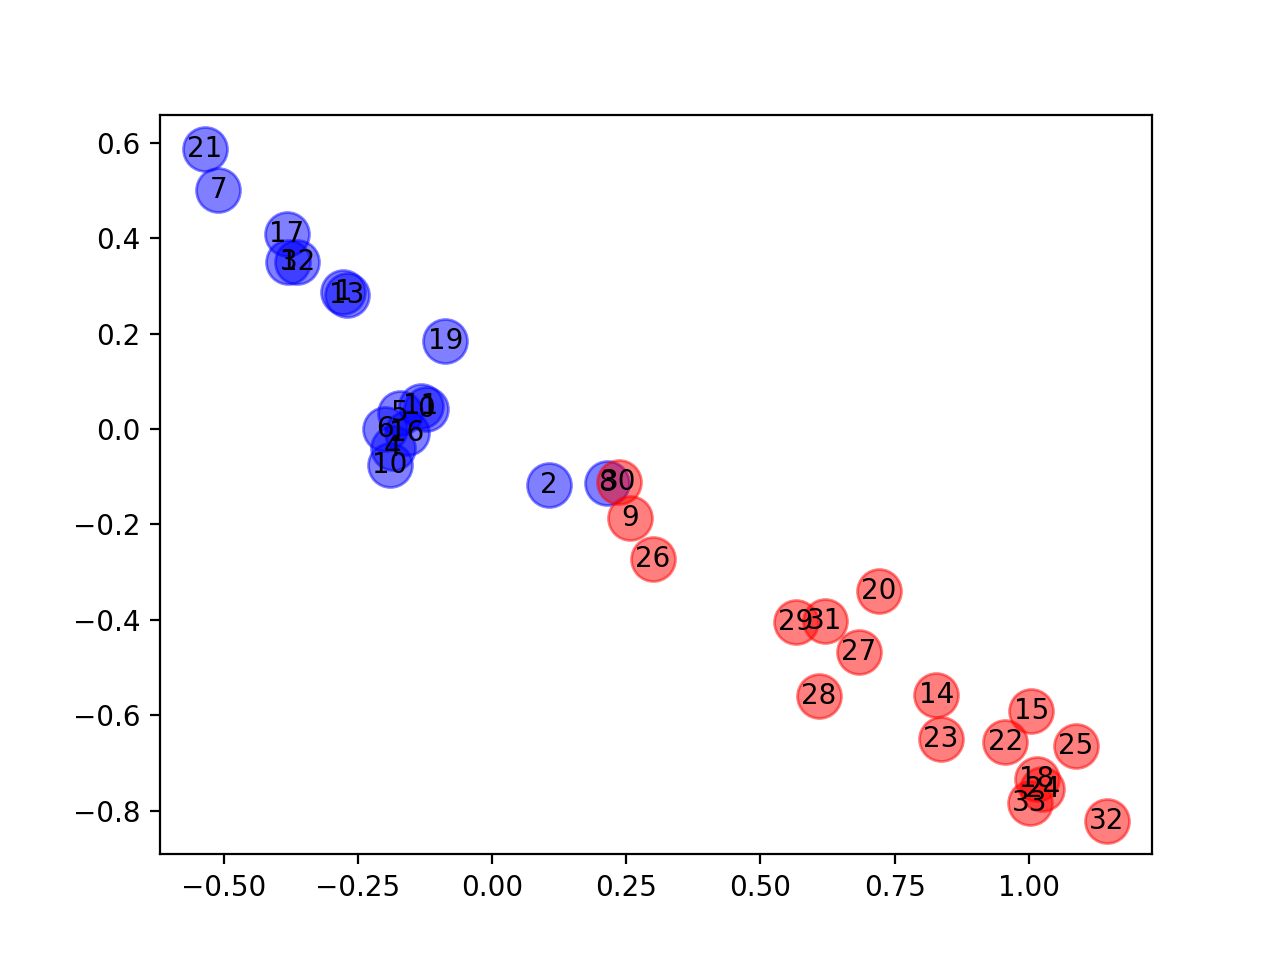

In [78]:
plot_result(output_2)

效果好很多